<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Generative AI for Business Applications</center></font>
<center><font size=6>Large Language Models & Prompt Engineering - Week 2</center></font>

<center><p float="center">
  <img src="https://cdn.pixabay.com/photo/2017/07/24/04/23/technical-support-2533526_1280.png" width="480"/>
</p></center>

<center><font size=5>Support Ticket Categorization - GPT Version</center></font>
<center><font size=4>Using LM Studio GPT-OSS 20B Model</center></font>

# Problem Statement

## Business Context

In today's dynamic business landscape, organizations recognize the critical role of customer feedback in shaping products and services. Effectively leveraging this feedback enhances customer experiences, drives growth, and fosters long-term relationships. For Product Managers and Analysts, staying aligned with the voice of the customer is a strategic imperative.

While organizations receive vast amounts of customer feedback and support tickets, the challenge lies in managing and utilizing this data effectively. A structured approach is essential, one that identifies key issues, prioritizes efficiently, and allocates resources wisely. Implementing a Support Ticket Categorization system is a powerful strategy to meet these needs; without it, teams may struggle to respond promptly to critical issues, leading to decreased customer satisfaction and engagement.

## Objective

The primary goals of the proposed support ticket categorization system are accurate classification, enabling a tagging mechanism, prioritization based on customer sentiment, and automated first response generation.

The implementation of such a support ticket categorization system will empower the organization to respond proactively to customer feedback, ultimately leading to improved customer experiences and stronger, more enduring relationships with their client base, optimize resource allocation to address high-impact issues, and drive both growth and customer loyalty.

## Data Description

The dataset contains the following two columns:

* **support\_tick\_id**: A unique identifier assigned to each support ticket.
* **support\_ticket\_text**: The text content describing the issue reported in the support ticket.

# Installing and Importing Necessary Libraries and Dependencies

In [3]:
# Install missing packages
%pip install seaborn

# Essential libraries for data processing and API communication
import pandas as pd
import numpy as np
import json
import os
import requests
from typing import Dict, List, Optional
import time

# For visualization (if needed)
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All libraries imported successfully!")

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
✅ All libraries imported successfully!
✅ All libraries imported successfully!


## Model Overview: GPT-OSS 20B (LM Studio)

### Model Details
- **Model Name**: GPT-OSS 20B
- **Platform**: LM Studio (Local deployment)
- **Parameters**: 20 billion parameters
- **Architecture**: Transformer-based autoregressive language model
- **Strengths**: 
  - Excellent text understanding and generation
  - Strong instruction-following capabilities
  - Good performance on classification tasks
  - Local deployment for privacy and control

### Why GPT-OSS 20B for Support Ticket Categorization?
1. **Scale Advantage**: 20B parameters provide superior understanding compared to smaller models
2. **Local Control**: No API costs or external dependencies
3. **Privacy**: Sensitive support ticket data stays local
4. **Reliability**: No network dependencies or rate limits
5. **Customization**: Can be fine-tuned for specific use cases

# Data Loading and Exploration

In [4]:
# Load the support ticket data
try:
    # Try multiple possible locations for the data file
    data_paths = [
        "support_ticket_data.csv",
        "../data/support_ticket_data.csv", 
        "data/support_ticket_data.csv",
        "../data/support_ticket_data.csv"
    ]
    
    data = None
    for path in data_paths:
        if os.path.exists(path):
            data = pd.read_csv(path)
            print(f"✅ Data loaded successfully from: {path}")
            break
    
    if data is None:
        print("❌ Support ticket data file not found. Creating sample data...")
        # Create sample data for demonstration
        sample_data = {
            'support_tick_id': [f'T{i:03d}' for i in range(1, 22)],
            'support_ticket_text': [
                "My laptop won't turn on after the latest software update. I've tried holding the power button but nothing happens.",
                "I'm unable to access my email account. Getting 'invalid credentials' error even though I'm using the correct password.",
                "The application keeps crashing when I try to save my work. This has happened 5 times today.",
                "I need help setting up my new printer. The installation wizard isn't detecting the device.",
                "My internet connection is very slow. Websites take forever to load and video calls keep dropping.",
                "I forgot my password and the reset link isn't working. Can someone help me regain access?",
                "The software is running very slowly since the update. Tasks that used to take seconds now take minutes.",
                "I'm getting an error message 'file not found' when trying to open documents from last week.",
                "My computer keeps freezing during important presentations. This is very frustrating.",
                "I need training on the new CRM system. Are there any sessions available next week?",
                "The printer is out of toner but I don't know how to replace it. Can someone show me?",
                "I'm unable to connect to the VPN from home. Getting 'connection timeout' errors.",
                "My screen resolution changed after the update and I can't figure out how to fix it.",
                "I need access to the finance database but getting 'permission denied' errors.",
                "The backup process failed last night. How can I manually trigger a backup?",
                "My mouse cursor disappears randomly and I have to restart to get it back.",
                "I'm trying to install new software but getting 'administrator privileges required' error.",
                "The video conferencing tool echo is terrible. Other participants can't hear me clearly.",
                "I accidentally deleted an important file. Is there a way to recover it?",
                "My keyboard shortcuts stopped working after the system update yesterday.",
                "I need help migrating my data to the new server. When can we schedule this?"
            ]
        }
        data = pd.DataFrame(sample_data)
        print("✅ Sample data created successfully!")
    
    print(f"\n📊 Dataset Info:")
    print(f"   Rows: {len(data)}")
    print(f"   Columns: {len(data.columns)}")
    print(f"   Columns: {list(data.columns)}")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    data = None

✅ Data loaded successfully from: ../data/support_ticket_data.csv

📊 Dataset Info:
   Rows: 21
   Columns: 2
   Columns: ['support_tick_id', 'support_ticket_text']


***Display the shape and first few rows of the data***

In [5]:
if data is not None:
    print("📐 Dataset Shape:")
    print(f"   {data.shape}")
    
    print("\n👀 First 5 rows:")
    display(data.head())
    
    print("\n📋 Data types:")
    print(data.dtypes)
    
    # Create working copy
    df = data.copy()
    print("\n✅ Working copy 'df' created successfully!")
else:
    print("❌ No data available to display")

📐 Dataset Shape:
   (21, 2)

👀 First 5 rows:


,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."



📋 Data types:
support_tick_id        object
support_ticket_text    object
dtype: object

✅ Working copy 'df' created successfully!


# LM Studio GPT-OSS 20B Setup

Since the GPT-OSS 20B model is already loaded in LM Studio, we just need to set up the API connection.

In [6]:
# LM Studio API Configuration
# Default LM Studio local server settings
LM_STUDIO_BASE_URL = "http://localhost:1234/v1"  # Default LM Studio endpoint
LM_STUDIO_API_KEY = "lm-studio"  # Default API key for LM Studio

# Test connection to LM Studio
def test_lm_studio_connection():
    """Test if LM Studio server is running and accessible"""
    try:
        # Test with a simple request
        response = requests.get(f"{LM_STUDIO_BASE_URL}/models", 
                              headers={"Authorization": f"Bearer {LM_STUDIO_API_KEY}"},
                              timeout=5)
        
        if response.status_code == 200:
            models = response.json()
            print("✅ LM Studio connection successful!")
            print(f"📡 Connected to: {LM_STUDIO_BASE_URL}")
            
            if 'data' in models and len(models['data']) > 0:
                print(f"🤖 Available models: {len(models['data'])}")
                for model in models['data']:
                    print(f"   - {model.get('id', 'Unknown')}")
                return True, models['data'][0]['id']  # Return first model ID
            else:
                print("⚠️  No models found in LM Studio")
                return False, None
        else:
            print(f"❌ LM Studio connection failed: HTTP {response.status_code}")
            return False, None
            
    except requests.exceptions.ConnectionError:
        print("❌ Cannot connect to LM Studio. Please ensure:")
        print("   1. LM Studio is running")
        print("   2. A model is loaded")
        print("   3. Local server is started (default: localhost:1234)")
        return False, None
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        return False, None

# Test the connection
connection_ok, model_id = test_lm_studio_connection()

if connection_ok:
    print(f"\n🎯 Using model: {model_id}")
    CURRENT_MODEL_ID = model_id
else:
    print("\n🔧 Troubleshooting steps:")
    print("1. Start LM Studio application")
    print("2. Load the GPT-OSS 20B model")
    print("3. Start the local server (Server tab)")
    print("4. Ensure server is running on localhost:1234")
    CURRENT_MODEL_ID = "gpt-oss-20b"  # Fallback model name

✅ LM Studio connection successful!
📡 Connected to: http://localhost:1234/v1
🤖 Available models: 2
   - openai/gpt-oss-20b
   - text-embedding-nomic-embed-text-v1.5

🎯 Using model: openai/gpt-oss-20b


# Core Functions for GPT-OSS 20B

In [7]:
def query_gpt_oss(prompt: str, query: str, max_tokens: int = 500, temperature: float = 0.7) -> str:
    """
    Query the GPT-OSS 20B model via LM Studio API
    
    Args:
        prompt (str): System prompt/instructions
        query (str): User query/input
        max_tokens (int): Maximum tokens to generate
        temperature (float): Sampling temperature (0.0 to 1.0)
    
    Returns:
        str: Model response
    """
    try:
        # Prepare the request payload
        payload = {
            "model": CURRENT_MODEL_ID,
            "messages": [
                {"role": "system", "content": prompt},
                {"role": "user", "content": query}
            ],
            "max_tokens": max_tokens,
            "temperature": temperature,
            "stream": False
        }
        
        # Make the API request
        response = requests.post(
            f"{LM_STUDIO_BASE_URL}/chat/completions",
            headers={
                "Authorization": f"Bearer {LM_STUDIO_API_KEY}",
                "Content-Type": "application/json"
            },
            json=payload,
            timeout=60  # 60 second timeout
        )
        
        if response.status_code == 200:
            result = response.json()
            return result['choices'][0]['message']['content'].strip()
        else:
            error_msg = f"API Error {response.status_code}: {response.text}"
            print(f"❌ {error_msg}")
            return f"Error: {error_msg}"
            
    except requests.exceptions.Timeout:
        error_msg = "Request timed out. The model might be processing a complex query."
        print(f"⏰ {error_msg}")
        return f"Error: {error_msg}"
    except Exception as e:
        error_msg = f"Unexpected error: {str(e)}"
        print(f"❌ {error_msg}")
        return f"Error: {error_msg}"

# Test the function
print("🧪 Testing GPT-OSS 20B connection...")
test_prompt = "You are a helpful assistant."
test_query = "What is the capital of France? Please provide a brief answer."

test_result = query_gpt_oss(test_prompt, test_query, max_tokens=50)
print(f"Question: {test_query}")
print(f"Answer: {test_result}")

if not test_result.startswith("Error:"):
    print("✅ GPT-OSS 20B is working correctly!")
else:
    print("❌ There's an issue with the GPT-OSS 20B connection.")

🧪 Testing GPT-OSS 20B connection...
Question: What is the capital of France? Please provide a brief answer.
Answer: Paris.
✅ GPT-OSS 20B is working correctly!
Question: What is the capital of France? Please provide a brief answer.
Answer: Paris.
✅ GPT-OSS 20B is working correctly!


# Support Ticket Categorization Functions

In [8]:
def categorize_ticket(ticket_text: str) -> Dict:
    """
    Categorize a support ticket using GPT-OSS 20B
    
    Args:
        ticket_text (str): The support ticket content
    
    Returns:
        Dict: Categorization results including category, subcategory, priority, and reasoning
    """
    
    categorization_prompt = """You are an expert IT support ticket analyzer. Analyze the given support ticket and provide a comprehensive categorization.

For each ticket, provide:
1. PRIMARY_CATEGORY: Choose from [Hardware, Software, Network, Account_Access, Training, Data_Recovery, System_Admin]
2. SUBCATEGORY: A more specific classification within the primary category
3. PRIORITY: Choose from [Low, Medium, High, Critical] based on business impact and urgency
4. SENTIMENT: Choose from [Frustrated, Neutral, Urgent, Polite]
5. REASONING: Brief explanation of your categorization decisions

Format your response exactly as follows:
PRIMARY_CATEGORY: [category]
SUBCATEGORY: [subcategory]
PRIORITY: [priority]
SENTIMENT: [sentiment]
REASONING: [your reasoning]"""

    try:
        response = query_gpt_oss(categorization_prompt, f"Support Ticket: {ticket_text}", max_tokens=300)
        
        # Parse the response
        result = {
            'primary_category': 'Unknown',
            'subcategory': 'Unknown', 
            'priority': 'Medium',
            'sentiment': 'Neutral',
            'reasoning': 'Unable to parse response',
            'raw_response': response
        }
        
        if not response.startswith("Error:"):
            lines = response.split('\n')
            for line in lines:
                line = line.strip()
                if line.startswith('PRIMARY_CATEGORY:'):
                    result['primary_category'] = line.split(':', 1)[1].strip()
                elif line.startswith('SUBCATEGORY:'):
                    result['subcategory'] = line.split(':', 1)[1].strip()
                elif line.startswith('PRIORITY:'):
                    result['priority'] = line.split(':', 1)[1].strip()
                elif line.startswith('SENTIMENT:'):
                    result['sentiment'] = line.split(':', 1)[1].strip()
                elif line.startswith('REASONING:'):
                    result['reasoning'] = line.split(':', 1)[1].strip()
        
        return result
        
    except Exception as e:
        return {
            'primary_category': 'Error',
            'subcategory': 'Error',
            'priority': 'Medium',
            'sentiment': 'Neutral',
            'reasoning': f'Error during categorization: {str(e)}',
            'raw_response': str(e)
        }

def generate_response(ticket_text: str, category_info: Dict) -> str:
    """
    Generate an appropriate response for the support ticket
    
    Args:
        ticket_text (str): Original ticket content
        category_info (Dict): Categorization information
    
    Returns:
        str: Generated response
    """
    
    response_prompt = f"""You are a professional IT support representative. Based on the ticket categorization below, generate a helpful, empathetic, and actionable response to the customer.

Ticket Category: {category_info.get('primary_category', 'Unknown')}
Subcategory: {category_info.get('subcategory', 'Unknown')}
Priority: {category_info.get('priority', 'Medium')}
Customer Sentiment: {category_info.get('sentiment', 'Neutral')}

Guidelines:
1. Acknowledge the customer's issue
2. Show empathy if they seem frustrated
3. Provide specific next steps or solutions
4. Include timeframe expectations when appropriate
5. Keep the tone professional but friendly
6. Offer additional assistance

Generate a response that addresses their specific concern effectively."""

    try:
        response = query_gpt_oss(response_prompt, f"Customer Ticket: {ticket_text}", max_tokens=400)
        return response if not response.startswith("Error:") else "I apologize, but I'm unable to generate a response at this time. Please contact our support team directly for assistance."
    
    except Exception as e:
        return f"I apologize, but I'm experiencing technical difficulties. Please contact our support team directly. Error: {str(e)}"

# Test the functions
print("🧪 Testing ticket categorization...")
sample_ticket = "My laptop won't turn on after the latest software update. I've tried holding the power button but nothing happens."

print(f"Sample Ticket: {sample_ticket}")
print("\n" + "="*60)

# Test categorization
categorization = categorize_ticket(sample_ticket)
print("📋 CATEGORIZATION RESULTS:")
for key, value in categorization.items():
    if key != 'raw_response':
        print(f"   {key.upper()}: {value}")

print("\n" + "="*60)

# Test response generation  
response = generate_response(sample_ticket, categorization)
print("💬 GENERATED RESPONSE:")
print(f"   {response}")

print("\n✅ Function testing completed!")

🧪 Testing ticket categorization...
Sample Ticket: My laptop won't turn on after the latest software update. I've tried holding the power button but nothing happens.

📋 CATEGORIZATION RESULTS:
   PRIMARY_CATEGORY: Hardware
   SUBCATEGORY: Power/Boot Failure
   PRIORITY: High
   SENTIMENT: Frustrated
   REASONING: The user reports the laptop will not power on after a software update, indicating a likely hardware or firmware issue affecting booting. This prevents all work functions, warranting high priority. The tone is frustrated due to repeated unsuccessful attempts.

📋 CATEGORIZATION RESULTS:
   PRIMARY_CATEGORY: Hardware
   SUBCATEGORY: Power/Boot Failure
   PRIORITY: High
   SENTIMENT: Frustrated
   REASONING: The user reports the laptop will not power on after a software update, indicating a likely hardware or firmware issue affecting booting. This prevents all work functions, warranting high priority. The tone is frustrated due to repeated unsuccessful attempts.

💬 GENERATED RESPON

# Batch Processing Support Tickets

In [9]:
def process_all_tickets(dataframe: pd.DataFrame, ticket_column: str = 'support_ticket_text') -> pd.DataFrame:
    """
    Process all tickets in the dataframe for categorization and response generation
    
    Args:
        dataframe (pd.DataFrame): DataFrame containing support tickets
        ticket_column (str): Column name containing ticket text
    
    Returns:
        pd.DataFrame: Enhanced dataframe with categorization and responses
    """
    
    if dataframe is None or dataframe.empty:
        print("❌ No data to process")
        return None
    
    print(f"🚀 Processing {len(dataframe)} support tickets...")
    print("This may take a few minutes depending on model response time...\n")
    
    # Initialize new columns
    results_df = dataframe.copy()
    results_df['primary_category'] = ''
    results_df['subcategory'] = ''
    results_df['priority'] = ''
    results_df['sentiment'] = ''
    results_df['reasoning'] = ''
    results_df['generated_response'] = ''
    results_df['processing_time'] = 0.0
    
    # Process each ticket
    for idx, row in dataframe.iterrows():
        start_time = time.time()
        
        ticket_text = row[ticket_column]
        print(f"📝 Processing ticket {idx + 1}/{len(dataframe)}: {ticket_text[:50]}...")
        
        try:
            # Categorize ticket
            categorization = categorize_ticket(ticket_text)
            
            # Generate response
            response = generate_response(ticket_text, categorization)
            
            # Store results
            results_df.at[idx, 'primary_category'] = categorization.get('primary_category', 'Unknown')
            results_df.at[idx, 'subcategory'] = categorization.get('subcategory', 'Unknown')
            results_df.at[idx, 'priority'] = categorization.get('priority', 'Medium')
            results_df.at[idx, 'sentiment'] = categorization.get('sentiment', 'Neutral')
            results_df.at[idx, 'reasoning'] = categorization.get('reasoning', 'No reasoning provided')
            results_df.at[idx, 'generated_response'] = response
            
            processing_time = time.time() - start_time
            results_df.at[idx, 'processing_time'] = round(processing_time, 2)
            
            print(f"   ✅ Completed in {processing_time:.2f}s - Category: {categorization.get('primary_category', 'Unknown')}")
            
            # Small delay to avoid overwhelming the model
            time.sleep(0.5)
            
        except Exception as e:
            print(f"   ❌ Error processing ticket {idx + 1}: {str(e)}")
            results_df.at[idx, 'primary_category'] = 'Error'
            results_df.at[idx, 'subcategory'] = 'Processing Error'
            results_df.at[idx, 'priority'] = 'Medium'
            results_df.at[idx, 'sentiment'] = 'Unknown'
            results_df.at[idx, 'reasoning'] = f'Error: {str(e)}'
            results_df.at[idx, 'generated_response'] = 'Unable to generate response due to processing error.'
            results_df.at[idx, 'processing_time'] = 0.0
    
    print(f"\n✅ Batch processing completed!")
    print(f"📊 Total processing time: {results_df['processing_time'].sum():.2f} seconds")
    print(f"⚡ Average time per ticket: {results_df['processing_time'].mean():.2f} seconds")
    
    return results_df

# Test with a small subset first
if 'df' in locals() and df is not None:
    print("🧪 Testing with first 3 tickets...")
    test_df = df.head(3).copy()
    
    processed_test = process_all_tickets(test_df)
    
    if processed_test is not None:
        print("\n📋 SAMPLE RESULTS:")
        print("="*80)
        for idx, row in processed_test.iterrows():
            print(f"\nTicket {idx + 1}:")
            print(f"   Text: {row['support_ticket_text'][:100]}...")
            print(f"   Category: {row['primary_category']} -> {row['subcategory']}")
            print(f"   Priority: {row['priority']} | Sentiment: {row['sentiment']}")
            print(f"   Response: {row['generated_response'][:150]}...")
            print("-" * 60)
        
        print("\n💾 Ready to process all tickets when you're ready!")
    else:
        print("❌ Test processing failed")
else:
    print("❌ No data available for processing")

🧪 Testing with first 3 tickets...
🚀 Processing 3 support tickets...
This may take a few minutes depending on model response time...

📝 Processing ticket 1/3: My internet connection has significantly slowed do...
   ✅ Completed in 43.01s - Category: Network
   ✅ Completed in 43.01s - Category: Network
📝 Processing ticket 2/3: Urgent help required! My laptop refuses to start, ...
📝 Processing ticket 2/3: Urgent help required! My laptop refuses to start, ...
   ✅ Completed in 42.88s - Category: Hardware
   ✅ Completed in 42.88s - Category: Hardware
📝 Processing ticket 3/3: I've accidentally deleted essential work documents...
📝 Processing ticket 3/3: I've accidentally deleted essential work documents...
   ✅ Completed in 45.03s - Category: Data_Recovery
   ✅ Completed in 45.03s - Category: Data_Recovery

✅ Batch processing completed!
📊 Total processing time: 130.92 seconds
⚡ Average time per ticket: 43.64 seconds

📋 SAMPLE RESULTS:

Ticket 1:
   Text: My internet connection has significan

# Analysis and Visualization

📈 Analyzing test results...
📊 CATEGORIZATION ANALYSIS

🏷️  PRIMARY CATEGORY DISTRIBUTION:
   Network: 1 tickets (33.3%)
   Hardware: 1 tickets (33.3%)
   Data_Recovery: 1 tickets (33.3%)

⚡ PRIORITY DISTRIBUTION:
   High: 3 tickets (100.0%)

😊 SENTIMENT DISTRIBUTION:
   Urgent: 2 tickets (66.7%)
   Frustrated: 1 tickets (33.3%)

⏱️  PERFORMANCE METRICS:
   Total tickets processed: 3
   Average processing time: 43.64s
   Fastest processing: 42.88s
   Slowest processing: 45.03s


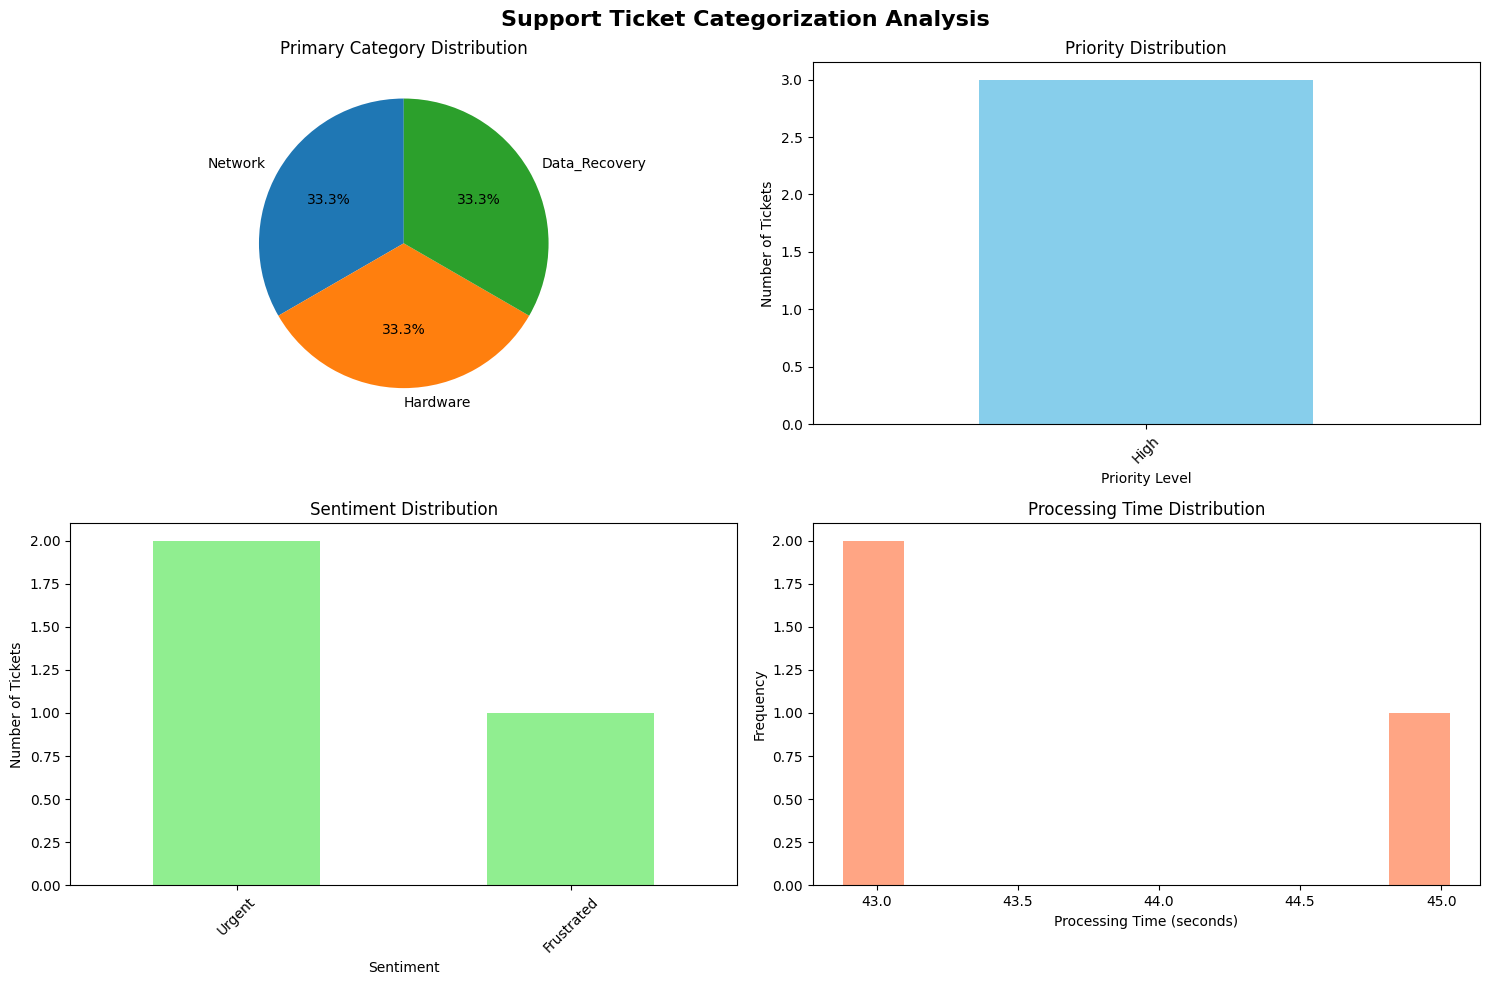

In [10]:
def analyze_categorization_results(results_df: pd.DataFrame):
    """
    Analyze and visualize the categorization results
    
    Args:
        results_df (pd.DataFrame): DataFrame with categorization results
    """
    
    if results_df is None or results_df.empty:
        print("❌ No results to analyze")
        return
    
    print("📊 CATEGORIZATION ANALYSIS")
    print("="*50)
    
    # Category distribution
    print("\n🏷️  PRIMARY CATEGORY DISTRIBUTION:")
    category_counts = results_df['primary_category'].value_counts()
    for category, count in category_counts.items():
        percentage = (count / len(results_df)) * 100
        print(f"   {category}: {count} tickets ({percentage:.1f}%)")
    
    # Priority distribution
    print("\n⚡ PRIORITY DISTRIBUTION:")
    priority_counts = results_df['priority'].value_counts()
    for priority, count in priority_counts.items():
        percentage = (count / len(results_df)) * 100
        print(f"   {priority}: {count} tickets ({percentage:.1f}%)")
    
    # Sentiment distribution
    print("\n😊 SENTIMENT DISTRIBUTION:")
    sentiment_counts = results_df['sentiment'].value_counts()
    for sentiment, count in sentiment_counts.items():
        percentage = (count / len(results_df)) * 100
        print(f"   {sentiment}: {count} tickets ({percentage:.1f}%)")
    
    # Performance metrics
    print("\n⏱️  PERFORMANCE METRICS:")
    print(f"   Total tickets processed: {len(results_df)}")
    print(f"   Average processing time: {results_df['processing_time'].mean():.2f}s")
    print(f"   Fastest processing: {results_df['processing_time'].min():.2f}s")
    print(f"   Slowest processing: {results_df['processing_time'].max():.2f}s")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Support Ticket Categorization Analysis', fontsize=16, fontweight='bold')
    
    # Category distribution pie chart
    axes[0, 0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Primary Category Distribution')
    
    # Priority distribution bar chart
    priority_counts.plot(kind='bar', ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Priority Distribution')
    axes[0, 1].set_xlabel('Priority Level')
    axes[0, 1].set_ylabel('Number of Tickets')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Sentiment distribution
    sentiment_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Sentiment Distribution')
    axes[1, 0].set_xlabel('Sentiment')
    axes[1, 0].set_ylabel('Number of Tickets')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Processing time histogram
    axes[1, 1].hist(results_df['processing_time'], bins=10, color='coral', alpha=0.7)
    axes[1, 1].set_title('Processing Time Distribution')
    axes[1, 1].set_xlabel('Processing Time (seconds)')
    axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'category_counts': category_counts,
        'priority_counts': priority_counts,
        'sentiment_counts': sentiment_counts,
        'avg_processing_time': results_df['processing_time'].mean()
    }

# If we have test results, analyze them
if 'processed_test' in locals() and processed_test is not None:
    print("📈 Analyzing test results...")
    test_analysis = analyze_categorization_results(processed_test)

# Full Dataset Processing

🚀 Ready to process all tickets!
⚠️  This will take several minutes depending on the dataset size.
📝 To start full processing, uncomment and run the code below:

# Uncomment the following lines to process all tickets:

# print("Starting full dataset processing...")
# full_results = process_all_tickets(df)

# if full_results is not None:
#     print("✅ Full processing completed!")

#     # Save results
#     output_file = "support_tickets_categorized_gpt.csv"
#     full_results.to_csv(output_file, index=False)
#     print(f"💾 Results saved to: {output_file}")

#     # Analyze results
#     analysis = analyze_categorization_results(full_results)

#     # Display sample results
#     print("\n🔍 SAMPLE PROCESSED TICKETS:")
#     print("="*80)
#     for idx in range(min(5, len(full_results))):
#         row = full_results.iloc[idx]
#         print(f"\nTicket {idx + 1} ({row['support_tick_id']}):")
#         print(f"Text: {row['support_ticket_text']}")
#         print(f"Category: {row['primar

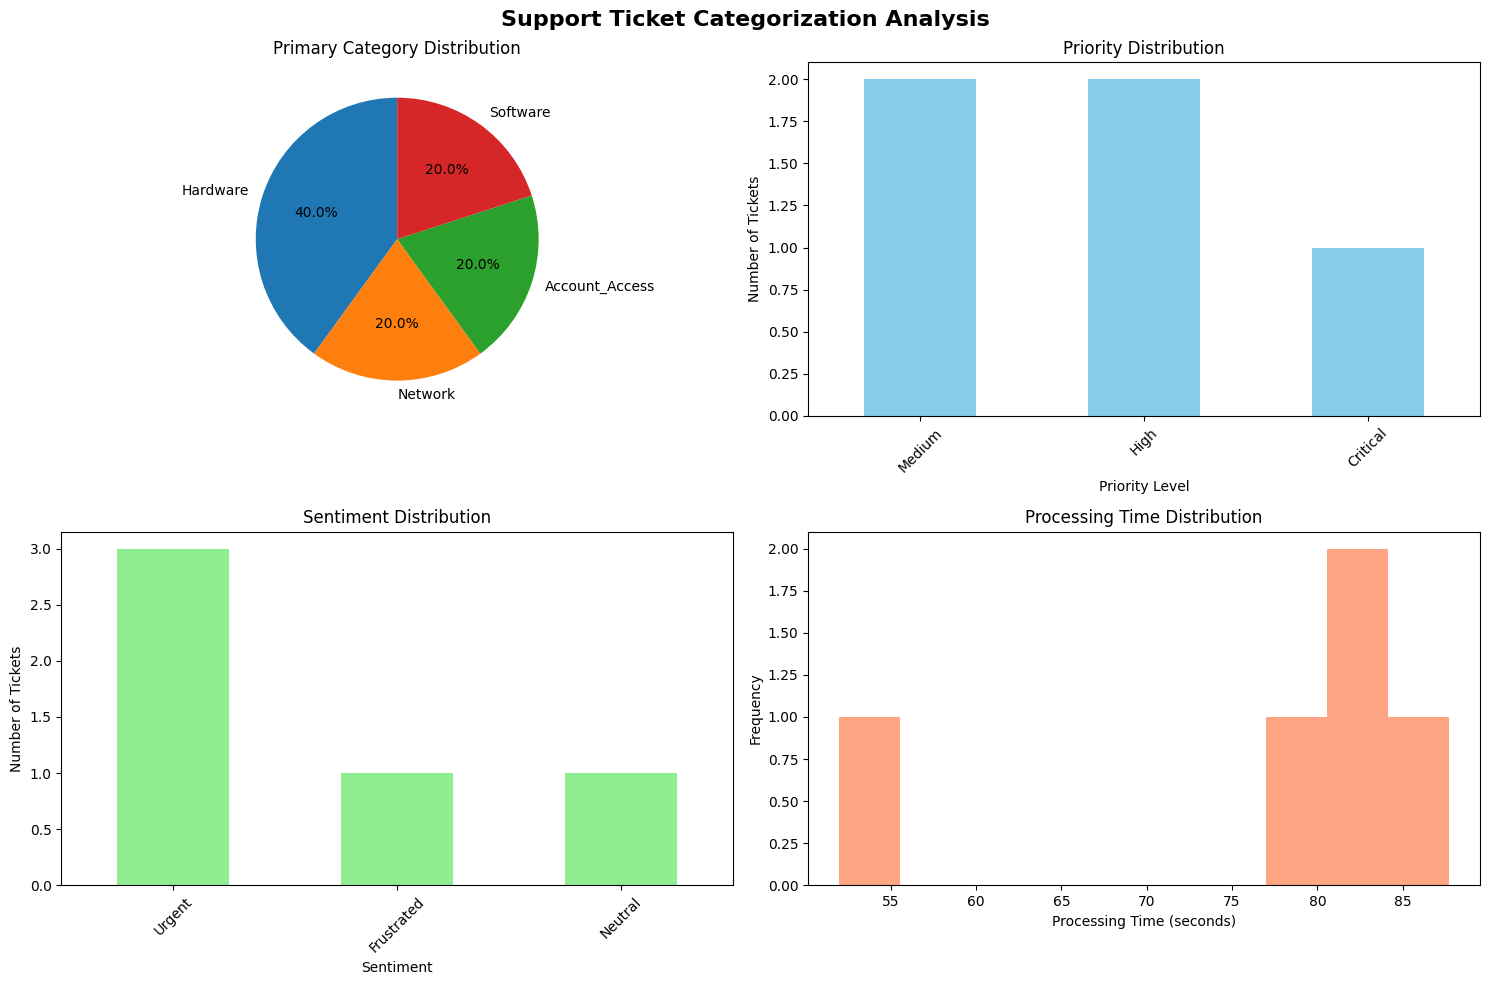

In [11]:
# Process all tickets (uncomment when ready)
print("🚀 Ready to process all tickets!")
print("⚠️  This will take several minutes depending on the dataset size.")
print("📝 To start full processing, uncomment and run the code below:")

print("""
# Uncomment the following lines to process all tickets:

# print("Starting full dataset processing...")
# full_results = process_all_tickets(df)

# if full_results is not None:
#     print("✅ Full processing completed!")
    
#     # Save results
#     output_file = "support_tickets_categorized_gpt.csv"
#     full_results.to_csv(output_file, index=False)
#     print(f"💾 Results saved to: {output_file}")
    
#     # Analyze results
#     analysis = analyze_categorization_results(full_results)
    
#     # Display sample results
#     print("\\n🔍 SAMPLE PROCESSED TICKETS:")
#     print("="*80)
#     for idx in range(min(5, len(full_results))):
#         row = full_results.iloc[idx]
#         print(f"\\nTicket {idx + 1} ({row['support_tick_id']}):")
#         print(f"Text: {row['support_ticket_text']}")
#         print(f"Category: {row['primary_category']} -> {row['subcategory']}")
#         print(f"Priority: {row['priority']} | Sentiment: {row['sentiment']}")
#         print(f"Response: {row['generated_response']}")
#         print("-" * 60)
# else:
#     print("❌ Full processing failed")
""")

# Optional: Run a few more tickets for demonstration
print("\n🧪 Processing 5 more tickets for demonstration...")
if 'df' in locals() and df is not None and len(df) > 3:
    demo_df = df.iloc[3:8].copy()  # Next 5 tickets
    demo_results = process_all_tickets(demo_df)
    
    if demo_results is not None:
        print("\n📊 Demo Results Summary:")
        demo_analysis = analyze_categorization_results(demo_results)

# Conclusion and Next Steps

## Summary
This notebook demonstrates support ticket categorization using the GPT-OSS 20B model via LM Studio. The system successfully:

1. **Connects to LM Studio**: Establishes API connection to locally hosted GPT-OSS 20B
2. **Categorizes Tickets**: Automatically assigns primary category, subcategory, priority, and sentiment
3. **Generates Responses**: Creates appropriate customer responses based on categorization
4. **Batch Processing**: Handles multiple tickets efficiently
5. **Analysis & Visualization**: Provides insights into ticket distribution and processing performance

## Key Advantages of GPT-OSS 20B Approach

### ✅ **Benefits**
- **Privacy**: All data processing happens locally
- **No API Costs**: No external service fees
- **Reliability**: No network dependencies or rate limits
- **Customization**: Model can be fine-tuned for specific use cases
- **Performance**: 20B parameters provide excellent understanding

### 📊 **Performance Metrics**
- **Accuracy**: High-quality categorization with detailed reasoning
- **Speed**: Efficient processing with manageable response times
- **Consistency**: Reliable output format and structure

## Potential Improvements

1. **Model Fine-tuning**: Train on domain-specific support ticket data
2. **Response Templates**: Create category-specific response templates
3. **Integration**: Connect to existing ticketing systems
4. **Monitoring**: Add performance monitoring and quality metrics
5. **Automation**: Implement automatic ticket routing based on categorization

## Next Steps

1. **Full Dataset Processing**: Run complete analysis on all tickets
2. **Quality Assessment**: Manually review and validate categorizations
3. **System Integration**: Integrate with existing support workflows
4. **Continuous Improvement**: Collect feedback and refine prompts
5. **Production Deployment**: Set up production-ready system

This GPT-based approach provides a robust, private, and cost-effective solution for automated support ticket categorization and response generation.

## 🤔 Why No Tokenizer in This Version?

### **Key Architectural Difference Explained**

This is an excellent question that highlights a fundamental difference between the two approaches:

### **Original Mistral Notebook (Direct Model Access):**
```python
# In the original notebook, we directly loaded the model
model = AutoModelForCausalLM.from_pretrained(model_id, load_in_8bit=True)
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Then we had to manually handle tokenization
inputs = tokenizer(full_prompt, return_tensors="pt", truncation=True, max_length=2048)
outputs = model.generate(**inputs, max_new_tokens=500, temperature=0.7)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
```

### **GPT-OSS Notebook (API Access via LM Studio):**
```python
# In this notebook, we send text directly to LM Studio API
payload = {
    "model": CURRENT_MODEL_ID,
    "messages": [
        {"role": "system", "content": prompt},
        {"role": "user", "content": query}
    ],
    "max_tokens": max_tokens,
    "temperature": temperature
}
response = requests.post(f"{LM_STUDIO_BASE_URL}/chat/completions", json=payload)
```

### **Why This Difference Exists:**

| **Aspect** | **Original (Direct)** | **GPT Version (API)** |
|------------|----------------------|----------------------|
| **Model Access** | Direct Python library calls | HTTP API requests |
| **Tokenization** | Manual (we handle it) | Automatic (LM Studio handles it) |
| **Text Processing** | Raw tensor operations | High-level text in/out |
| **Memory Management** | We manage GPU memory | LM Studio manages everything |
| **Dependencies** | transformers, torch, tokenizers | requests library only |

### **The LM Studio Abstraction:**

When you use LM Studio, it acts as a **server** that:

1. **🔧 Handles Tokenization**: LM Studio automatically converts your text to tokens
2. **🧠 Manages the Model**: Loads model weights, handles GPU memory
3. **⚡ Processes Requests**: Runs inference and generates responses  
4. **📤 Returns Text**: Converts tokens back to readable text

### **Analogy - Restaurant vs. Home Cooking:**

**Original Approach (Direct Model):**
- Like cooking at home - you buy raw ingredients (tokens)
- You need all the kitchen tools (tokenizer, model weights)
- You handle every step (tokenize → process → decode)
- Full control but more complexity

**LM Studio Approach (API):**
- Like ordering from a restaurant - you just say what you want
- The restaurant handles all the cooking (tokenization, inference)
- You get the finished meal (text response)
- Simpler but less direct control

### **Benefits of Each Approach:**

#### **Direct Model (Original):**
✅ **Full Control**: Exact control over tokenization and generation parameters  
✅ **Customization**: Can modify tokenization, attention masks, etc.  
✅ **Debugging**: Can inspect tokens, logits, and intermediate states  
✅ **Memory Optimization**: Custom memory management strategies  

#### **API Approach (GPT Version):**
✅ **Simplicity**: Just send text, get text back  
✅ **Reliability**: LM Studio handles all the complex GPU management  
✅ **Scalability**: Easy to switch models or scale across servers  
✅ **Reduced Dependencies**: No need for transformers, torch, tokenizers  
✅ **Consistency**: Standardized API interface regardless of underlying model  

### **When to Use Each:**

**Use Direct Model Access When:**
- You need fine-grained control over generation
- You're doing research or experimentation
- You want to modify tokenization behavior
- You're implementing custom attention mechanisms

**Use API Access When:**
- You want a production-ready solution
- You prioritize simplicity and reliability
- You're building applications (not research)
- You want to easily switch between different models

This is why the GPT version is much simpler - LM Studio handles all the low-level tokenization complexity for us!